# Predictores Categóricos - Variables Dummy 

Las variables categoricas pertenecen a una clasificación discreta y finita, por ejemplo, Género, Marcas de ropa, estaciones del año.
<br>
Una variable dummy permite incluir una variable categorica dentro de un modelo de regresión.

## Importar bibliotecas

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# Sobreescribe matplotlib por Seaborn
sns.set()

## Load the data

In [11]:
raw_data = pd.read_csv('Dummies.csv')

In [12]:
# Contiene una columna que determina Yes/No un estudiante ha asistido 75% al curso.
raw_data.head(n=5)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


## Map the data

In [13]:
# Map 'No' con 0 y 'Yes' con 1. 
# Estamos imitando las categorias con números.
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

print(raw_data.head(n=5))
print(data.head(n=5))

    SAT   GPA Attendance
0  1714  2.40         No
1  1664  2.52         No
2  1760  2.54         No
3  1685  2.74         No
4  1693  2.83         No
    SAT   GPA  Attendance
0  1714  2.40           0
1  1664  2.52           0
2  1760  2.54           0
3  1685  2.74           0
4  1693  2.83           0


In [14]:
# Estadisticas.
# La media de asistencia es < 0.5 podemos inferir que hay mas 0s que 1s.
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regresión

In [15]:
# La variable dependiente(y) es GPA
y = data ['GPA']
# La variable independiente (x) es SAT y Attendance
x1 = data [['SAT','Attendance']]

In [16]:
# Agregamos una nueva columna de 1s de igual longitud que SAT para poder calcular la constante de la regresión.
x = sm.add_constant(x1)
# Hacemos fit del modelo
results = sm.OLS(y,x).fit()
results.summary()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.19e-15
Time:                        21:35:50   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analizando los resultados:
<br>
Las variables dependientes son significativas, bajo error estandar.
<br>
Además, Adj. R-squared mejora de una 40% a un 56% la cantidad de variabilidad explicada.
<br>
Ahora tenemos dos ecuaciones: Si la variable dummy=0 o dummy=1

## Graficamos la linea de regresión

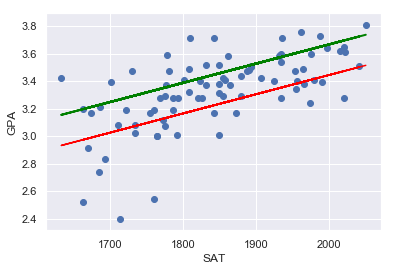

In [18]:
# Gráfica de puntos
plt.scatter(data['SAT'],y)
# Definimos las dos ecuaciones de regresión dependiendo si Attendance=yes o Attendance=No
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

plt.plot(data['SAT'],yhat_no, c="red")
plt.plot(data['SAT'],yhat_yes, lw=2, c='green')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

Las lineas de regresión tienen la misma pendiente pero diferente intersección.
<br>
Entonces, los estudiantes que si asisten a clases, tienen un GPA 0.2226 (0.8665-0.6439) más alto en promedio que los que no asisten a clases.

## Coloreando los puntos

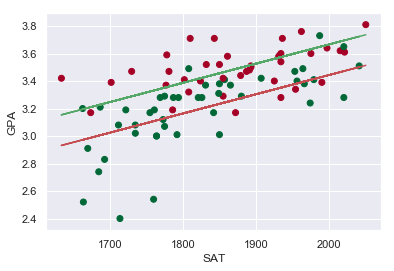

In [22]:
# Vamso a colorear los puntos dependiendo la variable Attendance

# 1) Hacemos la grafica de todos los puntos
# 2) Utilizamos la variable "Attendance"como el color y escogemos un mapa de colores
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Definimos las dos ecuaciones de regresion 
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Graficamos las lineas de regresión 
plt.plot(data['SAT'],yhat_no, c='R')
plt.plot(data['SAT'],yhat_yes, c='G')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

## Agregando la linea de regresión original

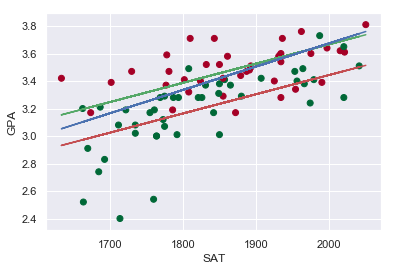

In [23]:
# Incluimos la linea de regrresión original sin las variables dummies
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Linea de regresión Original
yhat = 0.0017*data['SAT'] + 0.275

plt.plot(data['SAT'],yhat_no, c='r', label ='regresion Yes')
plt.plot(data['SAT'],yhat_yes, c='g', label ='regresion No')

# Graficamos la linea original
plt.plot(data['SAT'],yhat, c='b', label ='regression original')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Hacer predicciones usando la regresión lineal

In [25]:
# Revisando la variable independiente
x.head(n=5)

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [26]:
# Vamos a crear un nuevo dataframe, con la misma organización que X.
# Vamos a probar con dos valores diferentes de SAT
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})

# Por default, cuando se crea un nuevo df, las columnas se ordenan alfabeticamente.
# Asi que debemos reordenarlas a nuestra conveniencia para que tenga el mimso orden que el dataframe original
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
# Usamos el metodo predict en la regresion con el nuevo dataframe
# La veriable results es donde guardamos el fit del modelo
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [28]:
# Podemos crear un dataframe con todos los resultados juntos
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
joined = new_data.join(predictionsdf)
joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


El indice 1 predice mayor puntaje de GPA a pesar de que tiene menos puntaje SAT, esto es porque asisitio al 75% de las clases.